# San Diego Real Estate Analysis

This notebook will explore the San Diego housing market using data pulled from Zillow on 2 October 2017.

__Do note that this information is mostly for homes on sale.__

Imports are pretty straight forward.
CSV parser, numpy for working with number lists, and matplotlib for visualizations.

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

A list is initialized and populated using the csv file.
The CSV file is formatted as follows:

|address|city|state|zip|price|sqft|bedrooms|bathrooms|days_on_zillow|sale_type|url|
|-|-|-|-|-|-|-|-|-|-|-|
|2100 Rebecca Way|Lemon Grove|CA|91945|449000|1507.0|3.0|3.0|NA|House For Sale|http://www.zillow.com/homes/for_sale//homedetails/2100-Rebecca-Way-Lemon-Grove-CA-91945/80620236_zpid/|
|2130 Eldora St|Lemon Grove|CA|91945|429000|1532.0|3.0|2.0|NA|House For Sale|http://www.zillow.com/homes/for_sale//homedetails/2130-Eldora-St-Lemon-Grove-CA-91945/17113419_zpid/|

In [2]:
listings = []
with open('composition.csv') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        listings.append(row)

Some listings do not have an associated price, this function will simply make the script more legible within filter functions.

In [3]:
def has_price(listing):
    return listing['price'] != 'NA'

Inline import statements aren't conventional but the formatter import is obscure. The following block of code creates some functions which make formatting of the graphs easier to read.

In [4]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%.1fM' % (x*1e-6)

def thousands(x, pos):
    'The two args are the value and tick position'
    return '$%.1f' % (x*1e-5)

def formaty_mil(plot):
    fig, ax = plot.subplots()
    ax.yaxis.set_major_formatter(FuncFormatter(millions))

def formatx_mil(plot):
    fig, ax = plot.subplots()
    ax.xaxis.set_major_formatter(FuncFormatter(millions))

def formaty_100k(plot):
    fig, ax = plot.subplots()
    ax.yaxis.set_major_formatter(FuncFormatter(thousands))
    
def formatx_100k(plot):
    fig, ax = plot.subplots()
    ax.xaxis.set_major_formatter(FuncFormatter(thousands))
    

Let's start with a simple boxplot, with no special treatment of outliers

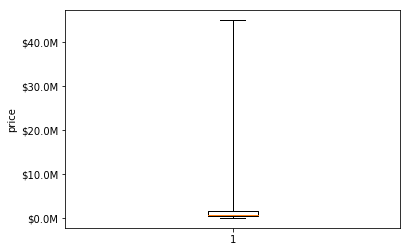

In [5]:
# set formating
formaty_mil(plt)

# get all prices that exist
all_prices = [float(listing['price']) for listing in listings if has_price(listing)]

plt.boxplot(all_prices, whis='range')
plt.ylabel('price')
plt.show()


This box plot almost seems like a mistake. But uppon furter inspection, it exists...

In [6]:
def search_by_price(price):
    ret = []
    for listing in listings:
        if has_price(listing) and float(listing['price']) == price:
            ret.append(listing)
    return ret

search_by_price(max(all_prices))

[OrderedDict([('address', '17111 El Vuelo'),
              ('city', 'RANCHO SANTA FE'),
              ('state', 'CA'),
              ('zip', '92067'),
              ('price', '44975000'),
              ('sqft', '23500.0'),
              ('bedrooms', '6.0'),
              ('bathrooms', '11.0'),
              ('days_on_zillow', 'NA'),
              ('sale_type', 'House For Sale'),
              ('url',
               'http://www.zillow.com/homes/for_sale//homedetails/17111-El-Vuelo-Rancho-Santa-Fe-CA-92067/16732045_zpid/')])]

A 23,500 sqft *house* in Rancho Santa Fe. More bathrooms than you could possibly use in a day and enough bedrooms for a boy scout camp. If your pockets need a diet you can check the listing [here](https://www.zillow.com/homes/for_sale//homedetails/17111-El-Vuelo-Rancho-Santa-Fe-CA-92067/16732045_zpid/).

Here is anothere perspective at how expensive this house is.

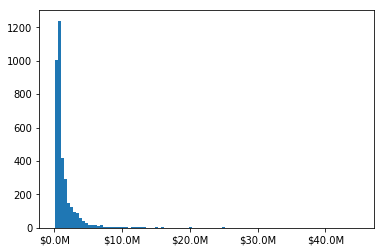

In [7]:
formatx_mil(plt)

plt.hist(all_prices, 100)
plt.show()

With this histogram a few other ouliers can be seen above $10 Million. Let's try to filter the outliers so we can get a perspective of normal people.

Firstly we need to define 'normal', and generally that is done using the `mean`. Once we have that we can also find out how unusual something is using the `standard deviation`.

In [8]:
# convert the array of prices to numpy for future continuity
all_prices = np.array(all_prices)

# median since we're here
price_median = np.median(all_prices)
print('median: ${:,}'.format(price_median))
# mean using numpy
price_mean = np.mean(all_prices)
print('mean: ${:,.0f}'.format(price_mean))
# std dev using numpy
price_stddev = np.std(all_prices)
print('stddev: ${:,.0f}'.format(price_stddev))

median: $734,450.0
mean: $1,425,830
stddev: $2,221,362


In [9]:
# calculate how many standard deviations the house on El Vuelo is from the mean
dev_of_max = (max(all_prices) - price_mean) / price_stddev
print('deviation of maximum: {:f}'.format(dev_of_max))

deviation of maximum: 19.604716


## Making Data Relevant
Sure enough, this house is outrageaously expensive; 19 standard deviations from the mean. Also notice that there can be no houses more than one standard deviation to the left of the mean. This makes it difficult to analyze the more affordable homes. Let's try to create a relevant histogram for the average homebuyer, one which the mean is close to the median and we can get at least 2 standard deviations from the mean in both sides.

In [10]:
# sort the prices
all_prices = np.sort(all_prices)

for i in [0.99, 0.95, 0.9, 0.85, 0.8, 0.75]:
    trimed_prices = all_prices[:int(len(all_prices)*i)]
    #make i a percent
    i = i * 100
    
    print("bottom {:.0f}%".format(i))
    # max
    price_max = max(trimed_prices)
    print('max: ${:,}'.format(price_max))
    # min
    price_min = min(trimed_prices)
    print('min: ${:,}'.format(price_min))
    # median
    price_median = np.median(trimed_prices)
    print('median: ${:,}'.format(price_median))
    # mean using numpy
    price_mean = np.mean(trimed_prices)
    print('mean: ${:,.0f}'.format(price_mean))
    # std dev using numpy
    price_stddev = np.std(trimed_prices)
    print('stddev: ${:,.0f}\n'.format(price_stddev))

bottom 99%
max: $10,500,000.0
min: $30,000.0
median: $720,870.0
mean: $1,269,896
stddev: $1,430,298

bottom 95%
max: $4,550,000.0
min: $30,000.0
median: $695,000.0
mean: $1,049,175
stddev: $910,590

bottom 90%
max: $3,185,000.0
min: $30,000.0
median: $660,000.0
mean: $899,341
stddev: $663,637

bottom 85%
max: $2,399,000.0
min: $30,000.0
median: $639,000.0
mean: $792,673
stddev: $508,234

bottom 80%
max: $1,825,000.0
min: $30,000.0
median: $599,999.0
mean: $711,293
stddev: $400,505

bottom 75%
max: $1,499,000.0
min: $30,000.0
median: $579,000.0
mean: $648,457
stddev: $327,167



Looks like the bottom 80% will be the sweet spot, going any lower will cut off too much data. Keep in mind we're only excluding some data for the purpose of making it relevant to the average homebuyer. It can no longer be used to represent the population (San Diego). That does not keep it from being a valid numerical analysis, it just has a different purpose, showing how many houses are affordable to the average homebuyer.

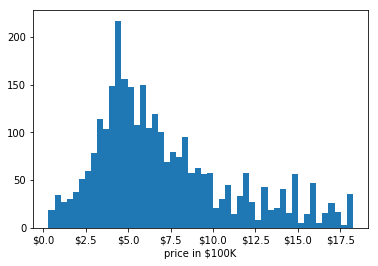

In [11]:
trimed_prices = all_prices[:int(len(all_prices)*0.8)]
formatx_100k(plt)

plt.hist(trimed_prices, 50)
plt.xlabel('price in $100K')
plt.show()

## Getting away from the money

Let's try to get away from pure price and analyze the different groups in our data.
Recall that our data is broken down into the following fields: `address`, `city`, `state`, `zip`, `price`, `sqft`, `bedrooms`, `bathrooms`, `days_on_zillow`, `sale_type`, `url`

For the purposes of grouping, `zip`,`sqft`,`bedrooms`,`bathrooms`,`sale_type` will be the most relevant for us. Lets with zip code.

## Zip code

The first thing that comes to mind with a zip code is to create some boxplots and compare them.

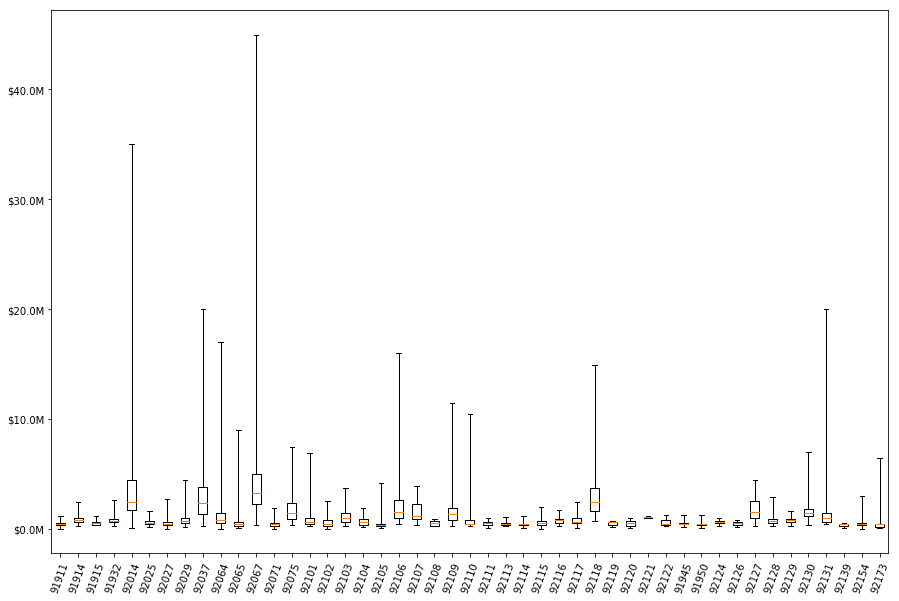

In [12]:
zip_price_dict = {}

# iterate listings populating lists for each zip code
for listing in listings:
    if has_price(listing):
        key = listing['zip']
        if key in zip_price_dict:
            zip_price_dict[key].append(float(listing['price']))
        else:
            zip_price_dict[key] = [float(listing['price'])]

# parallel lists
zips = []
prices = []
for k, v in zip_price_dict.items():
    zips.append(k)
    prices.append(v)
    
# formatting
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.boxplot(prices, whis='range')
ax.set_xticklabels(zips)
plt.xticks(rotation=70)
plt.show()

Once again, our data is saturated by extremely high values. Howver, we can see that the outliers are usually in an alrady outstanding zip code. By implementing a similar search function as above, we can find out the area these zip codes represent.

In [13]:
def search_by_zip(z):
    ret = []
    for listing in listings:
        if z == listing['zip']:
            ret.append(listing)
    return ret

# zip codes with top 3 outliers
for i in ['92067', '92014', '92037']:
    arr = search_by_zip(i)
    print(arr[0]['city'])

Rancho Santa Fe
Del Mar
La Jolla


This list should be no surpise to any San Diegan, nonetheless here it is backed by data.

Once again, let's make this data a little more relevant and trim off the top. We'll simply set a threshold of $3 Million to make it easy on ourselves

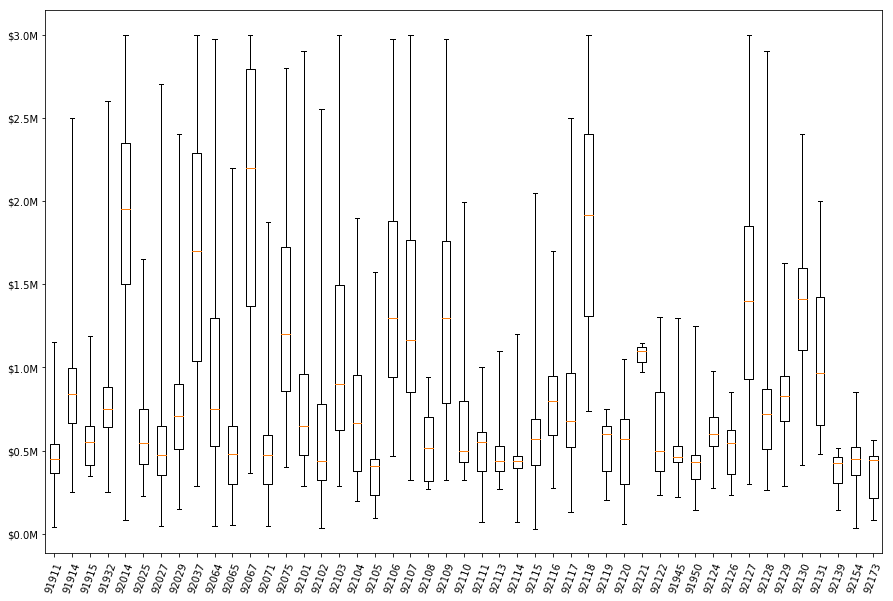

In [14]:
zip_price_dict = {}

# iterate listings populating lists for each zip code
for listing in listings:
    # filter prices above threshold
    if has_price(listing) and float(listing['price']) < 3e6:
        key = listing['zip']
        if key in zip_price_dict:
            zip_price_dict[key].append(float(listing['price']))
        else:
            zip_price_dict[key] = [float(listing['price'])]

# parallel lists
zips = []
prices = []
for k, v in zip_price_dict.items():
    zips.append(k)
    prices.append(v)
    
# formatting
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.boxplot(prices, whis='range')
ax.set_xticklabels(zips)
plt.xticks(rotation=70)
plt.show()

This visualization, while rough shows the relevant data in a more detailed fashion. It looks like a majority of zip codes have a median price around \$500, while also having maximums above \$1 Mil. Let's double check that:

In [15]:
# reuse the dict from above
zip_count = len(zip_price_dict)
print('zip count: ', zip_count)

med_close_to_500k = 0
max_over_mil = 0

for k in zip_price_dict:
    prices = zip_price_dict[k]
    if abs(np.median(prices) - 5e5) < 1e5:
        med_close_to_500k = med_close_to_500k + 1
    if max(prices) > 1e6:
        max_over_mil = max_over_mil + 1
print('median between $400K and $600K: ', med_close_to_500k, '({:.2f}%)'.format(med_close_to_500k/zip_count * 100))
print('max over $1 Mil: ', max_over_mil, '({:.2f}%)'.format(max_over_mil/zip_count * 100))
        

zip count:  47
median between $400K and $600K:  24 (51.06%)
max over $1 Mil:  39 (82.98%)


Just barely a majority for the median around $500k. But an astounding 87\% of zip codes in San Diego have million dollar homes. Sadly, inter-city comparison are out of the scope of this document but I don't think many cities can compare with these numbers.

## Square-footage

This field can be used in a few ways. 
* As a dependent variable with some input constraints such as price or number of bedrooms
* As an independent variable to get a feel for the price of house with desired size
* In the popular metric of dollars per square foot

We'll go through all of them.

The following viusualization will be used to represent a buyer's interest, in this case it will be more aparent than previous filters as the search criteria will be stricter.

We'll filter all houses which suit a buyer's necessity of 2 bedrooms and 3 bathrooms, and display the results in a histogram.

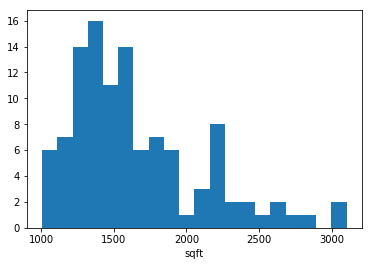

In [16]:
sqfts = []
# list notation too verbose
for listing in listings:
    if 'NA' in [listing['sqft'], listing['bedrooms'], listing['bathrooms']]:
        continue
    if float(listing['bedrooms']) == 2 and float(listing['bathrooms']) == 3:
        sqfts.append(float(listing['sqft']))

plt.hist(sqfts, 20)
plt.xlabel('sqft')
plt.show()

From this graph we can see that a 2 bedroom, 3 bath home will usually be around 1500 sqft. This might be handy when barganing... The same visualization can be done for price.

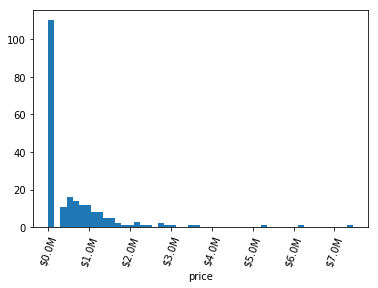

In [17]:
prices = []
# list notation too verbose
for listing in listings:
    if 'NA' in [listing['price'], listing['bedrooms'], listing['bathrooms']]:
        continue
    if float(listing['bedrooms']) == 2 and float(listing['bathrooms']) == 3:
        sqfts.append(float(listing['price']))

formatx_mil(plt)
plt.hist(sqfts, 50)
plt.xlabel('price')
plt.xticks(rotation=70)
plt.show()

Here we find that the buyer could easily spend $1 Mil on this home. Now let's put these two together and see how much we'd have to pay for a desired size.

This makes `sqft` the independent varible and it will be graphed on the x axis. `price` will be the dependent variable and graphed on the y-axis.

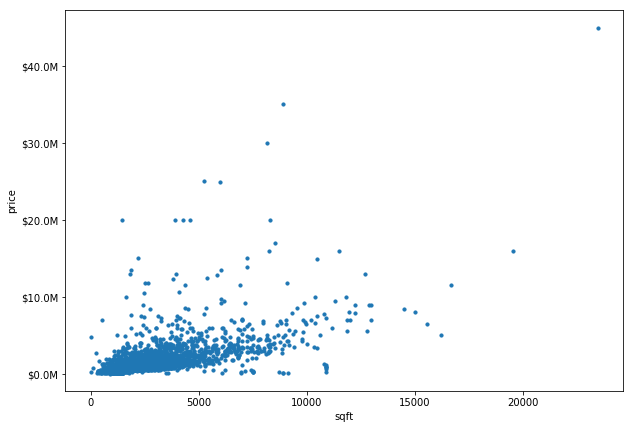

In [18]:
# parallel arrays for plotting
sqfts = []
prices = []
for listing in listings:
    if 'NA' not in [listing['price'], listing['sqft']]:
        sqfts.append(float(listing['sqft']))
        prices.append(float(listing['price']))

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.scatter(sqfts, prices, s=10)
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

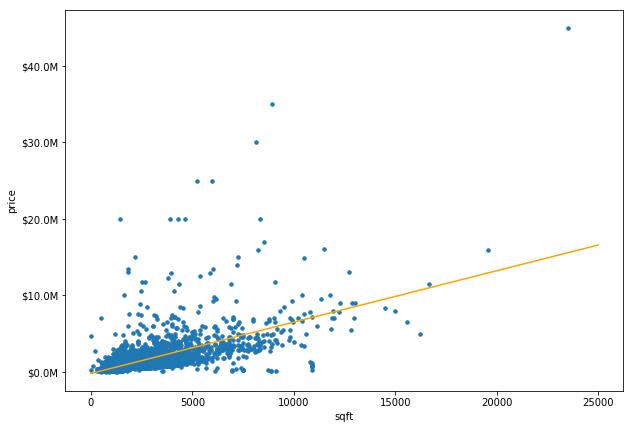

In [19]:
#linear regression
fit = np.polyfit(sqfts, prices, 1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.scatter(sqfts,prices, s=12)
plt.plot(range(25000), fit_fn(range(25000)), color='orange')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()